<a href="https://colab.research.google.com/github/VictoireHA/computational-mechanics/blob/master/HW_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework
## Problems [Part 1](./01_Linear-Algebra.md)

1. Consider 4 masses connected in series to 4 springs with K=1,000 N/m. What are the final positions of the masses i.e. when acceleration is 0? 

![Springs-masses](../images/mass_springs.png)

The masses haves the following amounts, $m_1=1,~m_2=2,~m_3=3,~and~m_4=4 kg.$ Using a FBD for each mass:

$m_{1}g+k(x_{2}-x_{1})-kx_{1}=0$

$m_{2}g+k(x_{3}-x_{2})-k(x_{2}-x_{1})=0$

$m_{3}g+k(x_{4}-x_{3})-k(x_{3}-x_{2})=0$

$m_{4}g-k(x_{4}-x_{3})=0$

in matrix form:

$\left[ \begin{array}{cccc}
2k & -k & 0 & 0 \\
-k & 2k & -k & 0 \\
0 & -k & 2k & -k \\
0 & 0 & -k & k \end{array} \right]
\left[ \begin{array}{c}
x_{1} \\
x_{2} \\
x_{3} \\
x_{4} \end{array} \right]=
\left[ \begin{array}{c}
m_{1}g \\
m_{2}g \\
m_{3}g \\
m_{4}g \end{array} \right]$

In [2]:
import numpy as np
A=np.array([[2000,-1000,0,0],[-1000,2000,-1000,0],[0,-1000,2000,-1000],[0,0,-1000,-1000]])
b=np.array([10,20,30,40])
x=np.linalg.solve(A,b)
for i in range(0,4):
    print('[{:5.1f} {:5.1f} {:5.1f} {:5.1f}] {} [{:3.5f}] {} [{:5.1f}]'.format(*A[i],'*',x[i],'=',b[i]))

[2000.0 -1000.0   0.0   0.0] * [0.01429] = [ 10.0]
[-1000.0 2000.0 -1000.0   0.0] * [0.01857] = [ 20.0]
[  0.0 -1000.0 2000.0 -1000.0] * [0.00286] = [ 30.0]
[  0.0   0.0 -1000.0 -1000.0] * [-0.04286] = [ 40.0]


![HVAC diagram showing the flow rates and connections between floors](../images/hvac.png)

2. In the figure above you have an idealized Heating, Ventilation and Air conditioning (HVAC) system. In the current configuration, the three-room building is being cooled off by $15^oC$ air fed into the building at 0.1 kg/s. Our goal is to determine the steady-state temperatures of the rooms given the following information

* $\dot{m}_1=0.1~kg/s$
* $\dot{m}_2=0.12~kg/s$
* $\dot{m}_3=0.12~kg/s$
* $\dot{m}_4=0.1~kg/s$
* $\dot{m}_5=0.02~kg/s$
* $\dot{m}_6=0.02~kg/s$
* $C_p=1000~\frac{J}{kg-K}$
* $\dot{Q}_{in} = 300~W$
* $T_{in} = 12^{o} C$

The energy-balance equations for rooms 1-3 create three equations:

1. $\dot{m}_1 C_p T_{in}+\dot{Q}_{in}-\dot{m}_2 C_p T_{1}+\dot{m}_6 C_p T_{2} = 0$

2. $\dot{m}_2 C_p T_{1}+\dot{Q}_{in}+\dot{m}_5 C_p T_{3}-\dot{m}_3 C_p T_{2}-\dot{m}_6 C_p T_{2} = 0$

3. $\dot{m}_3 C_p T_{2}+\dot{Q}_{in}-\dot{m}_5 C_p T_{3}-\dot{m}_4 C_p T_{3} = 0$

Identify the unknown variables and constants to create a linear algebra problem in the form of $\mathbf{Ax}=\mathbf{b}$.

a. Create the matrix $\mathbf{A}$

b. Create the known vector $\mathbf{b}$

c. Solve for the unknown variables, $\mathbf{x}$

d. What are the warmest and coldest rooms? What are their temperatures?

**a.  A=[[m2*cp,-m6*cp,0],[-m2*cp,(m3+m6)*cp,-m5*cp],[0,-m3*cp,(m4+m5)*cp]]**


**b.  B=[Qin+(m1*cp*Tin),Qin,Qin]**

In [3]:
import numpy as np

m1=0.1
m2=0.12
m3=0.12
m4=0.1
m5=0.02
m6=0.02
cp=1000.0
Qin=300.0
Tin=12.0

A=np.array([[m2*cp,-m6*cp,0],[-m2*cp,(m3+m6)*cp,-m5*cp],[0,-m3*cp,(m4+m5)*cp]])
b=np.array([Qin+(m1*cp*Tin),Qin,Qin])
x=np.linalg.solve(A,b)
for i in range(0,3):
    print('[{:5.1f} {:5.1f} {:5.1f}] {} [{:3.5f}] {} [{:5.1f}]'.format(*A[i],'*',x[i],'=',b[i]))

[120.0 -20.0   0.0] * [15.58333] = [1500.0]
[-120.0 140.0 -20.0] * [18.50000] = [300.0]
[  0.0 -120.0 120.0] * [21.00000] = [300.0]


d. Answers

**T1-Coolest**

**T3-Warmest**

3. The [Hilbert Matrix](https://en.wikipedia.org/wiki/Hilbert_matrix) has a high condition number and as the matrix increases dimensions, the condition number increases. Find the condition number of a 

a. $1 \times 1$ Hilbert matrix

b. $5 \times 5$ Hilbert matrix

c. $10 \times 10$ Hilbert matrix

d. $15 \times 15$ Hilbert matrix

e. $20 \times 20$ Hilbert matrix

If the accuracy of each matrix element is $\approx 10^{-16}$, what is the expected rounding error in the solution $\mathbf{Ax} = \mathbf{b}$, where $\mathbf{A}$ is the Hilbert matrix.

a. **1×1  Hilbert matrix**

In [ ]:
import numpy as np
N=1
H=np.zeros((N,N))
for i in range(0,N):
    for j in range(0,N):
        H[i,j]=1/(i+j+1)
print(H)
print('{:e}'.format(np.linalg.cond(H)))
print('Expected Rounding Error:',10**(-16))


[[1.]]
1.000000e+00
Expected Rounding Error: 1e-16


 b. **5×5  Hilbert matrix**

In [ ]:
import numpy as np
N=5
H=np.zeros((N,N))
for i in range(0,N):
    for j in range(0,N):
        H[i,j]=1/(i+j+1)
print(H)
print('{:e}'.format(np.linalg.cond(H)))
print('Expected Rounding Error:',10**(-11))

[[1.         0.5        0.33333333 0.25       0.2       ]
 [0.5        0.33333333 0.25       0.2        0.16666667]
 [0.33333333 0.25       0.2        0.16666667 0.14285714]
 [0.25       0.2        0.16666667 0.14285714 0.125     ]
 [0.2        0.16666667 0.14285714 0.125      0.11111111]]
4.766073e+05
Expected Rounding Error: 1e-11


c. **10×10  Hilbert matrix**

In [ ]:
import numpy as np
N=10
H=np.zeros((N,N))
for i in range(0,N):
    for j in range(0,N):
        H[i,j]=1/(i+j+1)
print(H)
print('{:e}'.format(np.linalg.cond(H)))
print('Expected Rounding Error:',10**(-3))

[[1.         0.5        0.33333333 0.25       0.2        0.16666667
  0.14285714 0.125      0.11111111 0.1       ]
 [0.5        0.33333333 0.25       0.2        0.16666667 0.14285714
  0.125      0.11111111 0.1        0.09090909]
 [0.33333333 0.25       0.2        0.16666667 0.14285714 0.125
  0.11111111 0.1        0.09090909 0.08333333]
 [0.25       0.2        0.16666667 0.14285714 0.125      0.11111111
  0.1        0.09090909 0.08333333 0.07692308]
 [0.2        0.16666667 0.14285714 0.125      0.11111111 0.1
  0.09090909 0.08333333 0.07692308 0.07142857]
 [0.16666667 0.14285714 0.125      0.11111111 0.1        0.09090909
  0.08333333 0.07692308 0.07142857 0.06666667]
 [0.14285714 0.125      0.11111111 0.1        0.09090909 0.08333333
  0.07692308 0.07142857 0.06666667 0.0625    ]
 [0.125      0.11111111 0.1        0.09090909 0.08333333 0.07692308
  0.07142857 0.06666667 0.0625     0.05882353]
 [0.11111111 0.1        0.09090909 0.08333333 0.07692308 0.07142857
  0.06666667 0.0625     

d. **15×15  Hilbert matrix**

In [ ]:
import numpy as np
N=15
H=np.zeros((N,N))
for i in range(0,N):
    for j in range(0,N):
        H[i,j]=1/(i+j+1)
print(H)
print('{:e}'.format(np.linalg.cond(H)))
print('Expected Rounding Error:',10**(17-16))

[[1.         0.5        0.33333333 0.25       0.2        0.16666667
  0.14285714 0.125      0.11111111 0.1        0.09090909 0.08333333
  0.07692308 0.07142857 0.06666667]
 [0.5        0.33333333 0.25       0.2        0.16666667 0.14285714
  0.125      0.11111111 0.1        0.09090909 0.08333333 0.07692308
  0.07142857 0.06666667 0.0625    ]
 [0.33333333 0.25       0.2        0.16666667 0.14285714 0.125
  0.11111111 0.1        0.09090909 0.08333333 0.07692308 0.07142857
  0.06666667 0.0625     0.05882353]
 [0.25       0.2        0.16666667 0.14285714 0.125      0.11111111
  0.1        0.09090909 0.08333333 0.07692308 0.07142857 0.06666667
  0.0625     0.05882353 0.05555556]
 [0.2        0.16666667 0.14285714 0.125      0.11111111 0.1
  0.09090909 0.08333333 0.07692308 0.07142857 0.06666667 0.0625
  0.05882353 0.05555556 0.05263158]
 [0.16666667 0.14285714 0.125      0.11111111 0.1        0.09090909
  0.08333333 0.07692308 0.07142857 0.06666667 0.0625     0.05882353
  0.05555556 0.05263

e. **20×20  Hilbert matrix**

In [ ]:
import numpy as np
N=20
H=np.zeros((N,N))
for i in range(0,N):
    for j in range(0,N):
        H[i,j]=1/(i+j+1)
print(H)
print('{:e}'.format(np.linalg.cond(H)))
print('Expected Rounding Error:',10**(18-16))

[[1.         0.5        0.33333333 0.25       0.2        0.16666667
  0.14285714 0.125      0.11111111 0.1        0.09090909 0.08333333
  0.07692308 0.07142857 0.06666667 0.0625     0.05882353 0.05555556
  0.05263158 0.05      ]
 [0.5        0.33333333 0.25       0.2        0.16666667 0.14285714
  0.125      0.11111111 0.1        0.09090909 0.08333333 0.07692308
  0.07142857 0.06666667 0.0625     0.05882353 0.05555556 0.05263158
  0.05       0.04761905]
 [0.33333333 0.25       0.2        0.16666667 0.14285714 0.125
  0.11111111 0.1        0.09090909 0.08333333 0.07692308 0.07142857
  0.06666667 0.0625     0.05882353 0.05555556 0.05263158 0.05
  0.04761905 0.04545455]
 [0.25       0.2        0.16666667 0.14285714 0.125      0.11111111
  0.1        0.09090909 0.08333333 0.07692308 0.07142857 0.06666667
  0.0625     0.05882353 0.05555556 0.05263158 0.05       0.04761905
  0.04545455 0.04347826]
 [0.2        0.16666667 0.14285714 0.125      0.11111111 0.1
  0.09090909 0.08333333 0.07692308

## Problems [Part 2](./02_Gauss_elimination.md)

1. 4 masses are connected in series to 4 springs with K=100N/m. What are the final positions of the masses? 

![Springs-masses](../images/mass_springs.png)

The masses haves the following amounts, 1, 2, 3, and 4 kg for masses 1-4. Using a FBD for each mass:

$m_{1}g+k(x_{2}-x_{1})-kx_{1}=0$

$m_{2}g+k(x_{3}-x_{2})-k(x_{2}-x_{1})=0$

$m_{3}g+k(x_{4}-x_{3})-k(x_{3}-x_{2})=0$

$m_{4}g-k(x_{4}-x_{3})=0$

in matrix form K=100 N/m:

$\left[ \begin{array}{cccc}
2k & -k & 0 & 0 \\
-k & 2k & -k & 0 \\
0 & -k & 2k & -k \\
0 & 0 & -k & k \end{array} \right]
\left[ \begin{array}{c}
x_{1} \\
x_{2} \\
x_{3} \\
x_{4} \end{array} \right]=
\left[ \begin{array}{c}
m_{1}g \\
m_{2}g \\
m_{3}g \\
m_{4}g \end{array} \right]$

In [ ]:
import numpy as np
A=np.array([[2000,-1000,0,0],[-1000,2000,-1000,0],[0,-1000,2000,-1000],[0,0,-1000,-1000]])
b=np.array([10,20,30,40])
x=np.linalg.solve(A,b)
for i in range(0,4):
    print('[{:5.1f} {:5.1f} {:5.1f} {:5.1f}] {} [{:3.5f}] {} [{:5.1f}]'.format(*A[i],'*',x[i],'=',b[i]))

[2000.0 -1000.0   0.0   0.0] * [0.01429] = [ 10.0]
[-1000.0 2000.0 -1000.0   0.0] * [0.01857] = [ 20.0]
[  0.0 -1000.0 2000.0 -1000.0] * [0.00286] = [ 30.0]
[  0.0   0.0 -1000.0 -1000.0] * [-0.04286] = [ 40.0]


![Triangular truss](../images/truss.png)

For problems __2-3__, consider the simple 3-element triangular truss, shown above, with a point load applied at the tip. The goal is to understand what tension is in the horizontal element, $P_1$. In problem __2__, the applied force is verical $(\theta=0)$ and in problem __3__ the applied force varies in angle $(\theta \neq 0)$. 

2. In the truss shown above, calculate the tension in bar 1, $P_1$, when $\theta=0$. When $\theta=0$, the $\sum F=0$ at each corner creates 3 equations and 3 unknowns as such (here, you reduce the number of equations with symmetry, $P_2=P_3,~R_2=R_3,~and~R_1=0$ ). 

$\left[ \begin{array}{ccc}
1 & \cos\alpha & 0 \\
0 & -2\cos\beta/2 & 0 \\
0 & \sin\alpha &  1 \\
 \end{array} \right]
\left[ \begin{array}{c}
P_{1} \\
P_{2} \\
R_{2} \end{array} \right]=
\left[ \begin{array}{c}
0 \\
F \\
0 \end{array} \right]$

a. Create the system of equations, $\mathbf{Ax}=\mathbf{b}$, when $\alpha=35^o$, $\beta=40^o$, and $F=1~kN$. Use __Gauss elimination__ to solve for $P_1,~P_2,~and~R_2$. What is the resulting augmented matrix, $\mathbf{A|y}$ after Gauss elimination?

b. Solve for the $\mathbf{LU}$ decomposition of $\mathbf{A}$. 

c. Use the $\mathbf{LU}$ solution to solve for the tension in bar 1 $(P_1)$ every 10 N values of force, F, between 100 N and 1100 N. Plot $P_1~vs~F$.

In [ ]:
def GaussNaive(A,y):
    '''GaussNaive: naive Gauss elimination
    x = GaussNaive(A,b): Gauss elimination without pivoting.
    solution method requires floating point numbers, 
    as such the dtype is changed to float
    
    Arguments:
    ----------
    A = coefficient matrix
    y = right hand side vector
    returns:
    ---------
    x = solution vector
    Aug = augmented matrix (used for back substitution)'''
    [m,n] = np.shape(A)
    Aug = np.block([A,y.reshape(n,1)])
    Aug = Aug.astype(float)
    if m!=n: error('Matrix A must be square')
    nb = n+1
    # Gauss Elimination 
    for k in range(0,n-1):
        for i in range(k+1,n):
            if Aug[i,k] != 0.0:
                factor = Aug[i,k]/Aug[k,k]
                Aug[i,:] = Aug[i,:] - factor*Aug[k,:]
    # Back substitution
    x=np.zeros(n)
    for k in range(n-1,-1,-1):
        x[k] = (Aug[k,-1] - Aug[k,k+1:n]@x[k+1:n])/Aug[k,k]
    return x,Aug

In [ ]:
import math

sin35=math.sin(math.radians(35))
cos35=math.cos(math.radians(35))
cos20=math.cos(math.radians(20))

A=np.array([[1,cos35, 0],[0,(-2*cos20),0],[ 0,sin35,1]])
y=np.array([0,1000,0])
Ay=np.array([[1,cos35, 0,0],[0,(-2*cos20),0,1000],[ 0,sin35,1,0]])

x, Aug = GaussNaive(A,y)

print('x=  \t\tAug=')
for i in range(len(x)):
    print('{:.2f}\t\t'.format(x[i]),Ay[i])

x=  		Aug=
435.86		 [1.         0.81915204 0.         0.        ]
-532.09		 [   0.           -1.87938524    0.         1000.        ]
305.19		 [0.         0.57357644 1.         0.        ]


**LU  decomposition of A**

In [ ]:
def LUNaive(A):
    '''LUNaive: naive LU decomposition
    L,U = LUNaive(A): LU decomposition without pivoting.
    solution method requires floating point numbers, 
    as such the dtype is changed to float
    
    Arguments:
    ----------
    A = coefficient matrix
    returns:
    ---------
    L = Lower triangular matrix
    U = Upper triangular matrix
    '''
    [m,n] = np.shape(A)
    if m!=n: error('Matrix A must be square')
    nb = n+1
    # Gauss Elimination
    U = A.astype(float)
    L = np.eye(n)

    for k in range(0,n-1):
        for i in range(k+1,n):
            if U[k,k] != 0.0:
                factor = U[i,k]/U[k,k]
                L[i,k]=factor
                U[i,:] = U[i,:] - factor*U[k,:]
    return L,U

In [ ]:
l,u=LUNaive(A)
print('L=',l)
print('U=',u)

L= [[ 1.          0.          0.        ]
 [ 0.          1.          0.        ]
 [ 0.         -0.30519365  1.        ]]
U= [[ 1.          0.81915204  0.        ]
 [ 0.         -1.87938524  0.        ]
 [ 0.          0.          1.        ]]


**LU decomposition of A using in-built function**

In [ ]:
from scipy.linalg import lu
p,l,u=lu(A)
print(l)
print(u)

[[ 1.          0.          0.          0.        ]
 [-0.5         1.          0.          0.        ]
 [ 0.         -0.66666667  1.          0.        ]
 [ 0.          0.         -0.75        1.        ]]
[[ 2000.         -1000.             0.             0.        ]
 [    0.          1500.         -1000.             0.        ]
 [    0.             0.          1333.33333333 -1000.        ]
 [    0.             0.             0.         -1750.        ]]


3. Using the same truss as shown above, let's calculate the tension in bar 1, $P_1$, when $\theta=[0...90^o]$ and $F=[100...1100]~kN$. When $\theta\neq 0$, the resulting 6 equations and 6 unknowns are given in the following matrix

$\left[ \begin{array}{ccc}
0 & \sin\alpha & 0 & 1 & 0 & 0 \\
1 & \cos\alpha & 0 & 0 & 1 & 0 \\
0 & \cos\beta/2 & \cos\beta/2 & 0 & 0 & 0 \\
0 & -\sin\beta/2 & \sin\beta/2 & 0 & 0 & 0 \\
-1 & 0 & \cos\alpha & 0 & 0 & 0 \\
0 & 0 & \sin\alpha & 0 & 0 & 1 \\
 \end{array} \right]
\left[ \begin{array}{c}
P_{1} \\
P_{2} \\
P_{3} \\
R_{1} \\
R_{2} \\
R_{3}\end{array} \right]=
\left[ \begin{array}{c}
0 \\
0 \\
F\cos\theta \\
-F\sin\theta \\
0 \\
0 \end{array} \right]$

a. Create the system of equations, $\mathbf{Ax}=\mathbf{b}$, when $\alpha=35^o$, $\beta=40^o$, $\theta=45^o=\pi/4$, and $F=1~kN$. Use __Gauss elimination__ to solve for $P_1,~P_2,~P_3,~R_1,~R_2,~and~R_3$. What is the resulting augmented matrix, $\mathbf{A|y}$ after Gauss elimination? _Hint: do you see a problem with the order of the equations? How can you __pivot__ to fix it?_

b. Solve for the $\mathbf{PLU}$ decomposition of $\mathbf{A}$. 

c. Use the $\mathbf{PLU}$ solution to solve for the tension in bar 1 $(P_1)$ every 10 N values of force, F, between 100 N and 1100 N. Plot $P_1~vs~F$.

In [ ]:
import math

sin35=math.sin(math.radians(35))
cos35=math.cos(math.radians(35))
cos20=math.cos(math.radians(20))
sin20=math.sin(math.radians(20))
cost=math.cos(math.radians(45))
sint=math.sin(math.radians(45))

A=np.array([[0,sin35, 0,1,0,0],[1,cos35,0,0,1,0],[0,cos20,cos20,0,0,0],[0,-sin20,sin20,0,0,0],[-1,0,cos35,0,0,0],[0,0,sin35,0,0,1]])
y=np.array([0,0,(1000*cost),(-1000*sint),0,0])

x, Aug = GaussNaive(A,y)

print('x=\t\tAug=')
for i in range(len(x)):
    print('{:.2f}'.format(x[i]),Aug[i])

x=		Aug=
nan [0.         0.57357644 0.         1.         0.         0.
 0.        ]
nan [ nan -inf  nan -inf  nan  nan  nan]
nan [nan nan nan nan nan nan nan]
nan [nan nan nan nan nan nan nan]
nan [nan nan nan nan nan nan nan]
nan [nan nan nan nan nan nan nan]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars


**Apply Partial pivoting** : Swap the Row 1 and Row 2 

In [ ]:
import math

sin35=math.sin(math.radians(35))
cos35=math.cos(math.radians(35))
cos20=math.cos(math.radians(20))
sin20=math.sin(math.radians(20))
cost=math.cos(math.radians(45))
sint=math.sin(math.radians(45))

A=np.array([[1,cos35,0,0,1,0],[0,sin35, 0,1,0,0],[0,cos20,cos20,0,0,0],[0,-sin20,sin20,0,0,0],[-1,0,cos35,0,0,0],[0,0,sin35,0,0,1]])
y=np.array([0,0,(1000*cost),(-1000*sint),0,0])

x, Aug = GaussNaive(A,y)

print('x=  \t\tAug=')
for i in range(len(x)):
    print('{:.2f}\t\t'.format(x[i]),Aug[i])

x=  		Aug=
-538.57		 [1.         0.81915204 0.         0.         1.         0.
 0.        ]
1409.96		 [0.         0.57357644 0.         1.         0.         0.
 0.        ]
-657.48		 [  0.           0.           0.93969262  -1.63830409   0.
   0.         707.10678119]
-808.72		 [   0.            0.            0.            1.19258785    0.
    0.         -964.47260199]
-616.40		 [   0.            0.            0.            0.            1.
    0.         -616.40152591]
377.11		 [  0.          0.          0.          0.          0.          1.
 377.1134864]


**PLU  decomposition of A**

In [ ]:
from scipy.linalg import lu

P,L,U = lu(A) # a built-in partial-pivoting LU decomposition function
print('P=\n',P)
print('L=\n',L)
print('U=\n',U)

P=
 [[1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]
L=
 [[ 1.          0.          0.          0.          0.          0.        ]
 [ 0.          1.          0.          0.          0.          0.        ]
 [ 0.         -0.36397023  1.          0.          0.          0.        ]
 [ 0.          0.61038729 -0.83851265  1.          0.          0.        ]
 [-1.          0.8717234   0.          0.          1.          0.        ]
 [ 0.          0.          0.83851265  0.          0.          1.        ]]
U=
 [[1.         0.81915204 0.         0.         1.         0.        ]
 [0.         0.93969262 0.93969262 0.         0.         0.        ]
 [0.         0.         0.68404029 0.         0.         0.        ]
 [0.         0.         0.         1.         0.         0.        ]
 [0.         0.         0.         0.         1.         0.        ]
 [0.         0.         0.         0.         0.         1.      

In [ ]:
from scipy.linalg import lu

def solveLU(L,U,b):
    '''solveLU: solve for x when LUx = b
    x = solveLU(L,U,b): solves for x given the lower and upper 
    triangular matrix storage
    uses forward substitution for 
    1. Ly = b
    then backward substitution for
    2. Ux = y
    
    Arguments:
    ----------
    L = Lower triangular matrix
    U = Upper triangular matrix
    b = output vector
    
    returns:
    ---------
    x = solution of LUx=b '''
    n=len(b)
    x=np.zeros(n)
    y=np.zeros(n)
        
    # forward substitution
    for k in range(0,n):
        y[k] = b[k] - L[k,0:k]@y[0:k]
    # backward substitution
    for k in range(n-1,-1,-1):
        x[k] = (y[k] - U[k,k+1:n]@x[k+1:n])/U[k,k]
    return x

answer=solveLU(L,U,P.T@y)
print(answer)

[-538.57387392 1409.96461876 -657.47729946 -808.72248141 -616.40152591
  377.1134864 ]


## Problems [Part 3](./03_Linear-regression-algebra.md)

<img
src="https://i.imgur.com/LoBbHaM.png" alt="prony series diagram"
style="width: 300px;"/> <img src="https://i.imgur.com/8i140Zu.png" alt
= "stress relax data" style="width: 400px;"/> 

Viscoelastic Prony series model and stress-vs-time relaxation curve of wheat kernels [[3]](https://www.cerealsgrains.org/publications/plexus/cfw/pastissues/2013/Documents/CFW-58-3-0139.pdf). Stress relaxation curve of a wheat kernel from regressed equation data that illustrate where to locate relaxation times (vertical dotted lines) and stresses (horizontal black marks). $\sigma$ = stress; t = time.

2. [Viscoelasticity](https://en.wikipedia.org/wiki/Viscoelasticity) is a property of materials that exhibit stiffness, but also tend to flow slowly. One example is [Silly Putty](https://en.wikipedia.org/wiki/Silly_Putty), when you throw a lump it bounces, but if you leave it on a table it _creeps_, slowly flowing downwards. In the stress-vs-time plot above, a wheat kernel was placed under constant strain and the stress was recorded. In a purely elastic material, the stress would be constant. In a purely viscous material, the stress would decay to 0 MPa. 

Here, you have a viscoelastic material, so there is some residual elastic stress as $t\rightarrow \infty$. The researchers used a 4-part [Prony series](https://en.wikipedia.org/wiki/Prony%27s_method) to model viscoelasticity. The function they fit was

$\sigma(t) = a_1 e^{-t/1.78}+a_2 e^{-t/11}+a_3e^{-t/53}+a_4e^{-t/411}+a_5$

a. Load the data from the graph shown above in the file `../data/stress_relax.dat`. 

b. Create a $\mathbf{Z}$-matrix to perform the least-squares regression for the given Prony series equation $\mathbf{y} = \mathbf{Za}$.

c. Solve for the constants, $a_1,~a_2,~a_3,~a_4~,a_5$

d. Plot the best-fit function and the data from `../data/stress_relax.dat` _Use at least 50 points in time to get a smooth best-fit line._

Text(0, 0.5, 'Stress')

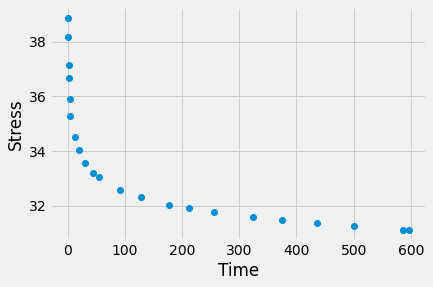

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

xy_data = np.loadtxt('stress_relax.dat',delimiter=',')
x=xy_data[:,0];
y=xy_data[:,1];
plt.plot(x,y,'o')
plt.xlabel('Time')
plt.ylabel('Stress')

In [ ]:
input_array=np.array(x)
Z=np.block([[np.exp(input_array/-1.78)],[np.exp(input_array/-11)],[np.exp(input_array/-53)],[np.exp(input_array/-411)],[np.exp(input_array*0/1)]]).T
Z


array([[1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
        1.00000000e+000, 1.00000000e+000],
       [5.63132906e-001, 9.11264203e-001, 9.80898998e-001,
        9.97516115e-001, 1.00000000e+000],
       [1.78579958e-001, 7.56716024e-001, 9.43784569e-001,
        9.92566840e-001, 1.00000000e+000],
       [1.78579958e-001, 7.56716024e-001, 9.43784569e-001,
        9.92566840e-001, 1.00000000e+000],
       [5.66310388e-002, 6.28378838e-001, 9.08074445e-001,
        9.87642121e-001, 1.00000000e+000],
       [5.66310388e-002, 6.28378838e-001, 9.08074445e-001,
        9.87642121e-001, 1.00000000e+000],
       [5.72719240e-004, 2.98796862e-001, 7.78243999e-001,
        9.68186381e-001, 1.00000000e+000],
       [1.82644756e-005, 1.71096803e-001, 6.93204742e-001,
        9.53846507e-001, 1.00000000e+000],
       [3.29858112e-008, 6.15643510e-002, 5.60697634e-001,
        9.28106088e-001, 1.00000000e+000],
       [1.88916087e-011, 1.83952349e-002, 4.36359569e-001,
        8.98579674e-001

In [ ]:
a=np.linalg.solve(Z.T@Z,Z.T@y)
a

array([ 1.90175278,  3.27373692,  1.05968924,  2.27846985, 30.55405629])

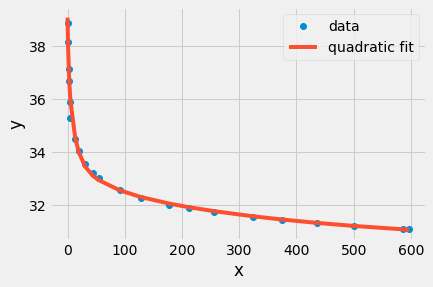

In [ ]:
x_fcn=np.linspace(min(x),max(x));
plt.plot(x,y,'o',label='data')
plt.plot(x,Z@a,label='quadratic fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

3. Load the '../data/primary-energy-consumption-by-region.csv' that has the energy consumption of different regions of the world from 1965 until 2018 [Our world in Data](https://ourworldindata.org/energy). 
You are going to compare the energy consumption of the United States to all of Europe. Load the data into a pandas dataframe. *Note: you can get certain rows of the data frame by specifying what you're looking for e.g. 
`EUR = dataframe[dataframe['Entity']=='Europe']` will give us all the rows from Europe's energy consumption.*

a. Use a piecewise least-squares regression to find a function for the energy consumption as a function of year

energy consumed = $f(t) = At+B+C(t-1970)H(t-1970)$

c. What is your prediction for US energy use in 2025? How about European energy use in 2025?

In [ ]:

fname = 'primary-energy-consumption-by-region.csv'

dataframe = pd.read_csv(fname)
temp_data=dataframe[dataframe['Entity']=='Europe']
t = temp_data['Year'].values
T = temp_data['Primary Energy Consumption (terawatt-hours)'].values

Z= np.block([[t],[t**0],[(t-1970)*(t>=1970)]]).T
Z

array([[1965,    1,    0],
       [1966,    1,    0],
       [1967,    1,    0],
       [1968,    1,    0],
       [1969,    1,    0],
       [1970,    1,    0],
       [1971,    1,    1],
       [1972,    1,    2],
       [1973,    1,    3],
       [1974,    1,    4],
       [1975,    1,    5],
       [1976,    1,    6],
       [1977,    1,    7],
       [1978,    1,    8],
       [1979,    1,    9],
       [1980,    1,   10],
       [1981,    1,   11],
       [1982,    1,   12],
       [1983,    1,   13],
       [1984,    1,   14],
       [1985,    1,   15],
       [1986,    1,   16],
       [1987,    1,   17],
       [1988,    1,   18],
       [1989,    1,   19],
       [1990,    1,   20],
       [1991,    1,   21],
       [1992,    1,   22],
       [1993,    1,   23],
       [1994,    1,   24],
       [1995,    1,   25],
       [1996,    1,   26],
       [1997,    1,   27],
       [1998,    1,   28],
       [1999,    1,   29],
       [2000,    1,   30],
       [2001,    1,   31],
 

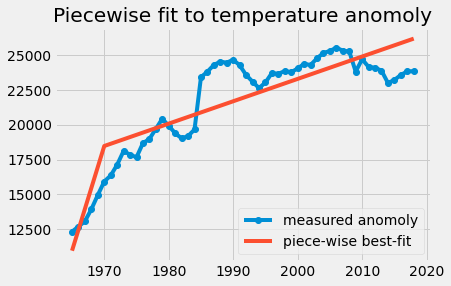

In [ ]:
fit = np.linalg.solve(Z.T@Z,Z.T@T)

plt.plot(t,T,'o-',label='measured anomoly')
plt.plot(t,Z@fit,label='piece-wise best-fit')
plt.title('Piecewise fit to temperature anomoly')
plt.legend();